# Banking Insurance Data

## 1) Import Libraries and check head of Dataframe

In [1]:
# Import Libraries
import pandas as pd
from __future__ import division
import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import sklearn.linear_model as linear
import random
sns.set(style="darkgrid")
import os,sys
import xlrd
import math
from pandas.tools.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
import datetime
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import pylab as p
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
import pydotplus
from IPython.display import Image  
import pydotplus
from io import BytesIO as StringIO
import copy
from copy import deepcopy
from sklearn import cross_validation
from numpy import random as np_random
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
% matplotlib inline

In [3]:
# Import the brvehins1 dataset
brevehins = pd.read_csv("brvehins1.csv",sep = ",")

In [4]:
# Check the head and the info of the features.
brevehins.info()
brevehins.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965355 entries, 0 to 1965354
Data columns (total 23 columns):
Gender                 object
DrivAge                object
VehYear                float64
VehModel               object
VehGroup               object
Area                   object
State                  object
StateAb                object
ExposTotal             float64
ExposFireRob           int64
PremTotal              float64
PremFireRob            int64
SumInsAvg              float64
ClaimNbRob             int64
ClaimNbPartColl        int64
ClaimNbTotColl         int64
ClaimNbFire            int64
ClaimNbOther           int64
ClaimAmountRob         float64
ClaimAmountPartColl    int64
ClaimAmountTotColl     float64
ClaimAmountFire        int64
ClaimAmountOther       int64
dtypes: float64(6), int64(10), object(7)
memory usage: 344.9+ MB


,Gender,DrivAge,VehYear,VehModel,VehGroup,Area,State,StateAb,ExposTotal,ExposFireRob,...,ClaimNbRob,ClaimNbPartColl,ClaimNbTotColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther
0,Female,>55,1997.0,Gm - Chevrolet - Kadett Gl 2.0 Mpfi / Efi,Gm Chevrolet Kadett,Interior,Rio de Janeiro,RJ,1.01,0,...,0,0,0,0,0,0.0,0,0.0,0,0
1,Female,36-45,2010.0,Gm - Chevrolet - Montana 1.4 8v Conquest Econo...,Gm Chevrolet Montana,Maranhao,Maranhao,MA,3.00,0,...,0,0,0,0,0,0.0,0,0.0,0,0
2,Female,18-25,2008.0,Vw - Volkswagen - Fox City 1.0mi/ 1.0mi Total ...,Vw Volkswagen Fox 1.0,Mato Grosso do Sul,Mato Grosso do Sul,MS,1.01,0,...,0,0,0,0,0,0.0,0,0.0,0,0
3,Male,>55,2004.0,Harley-davidson - Fat Boy,Harley-davidson Motos - Todas,Met. Porto Alegre e Caxias do Sul,Rio Grande do Sul,RS,1.45,0,...,0,0,0,0,0,0.0,0,0.0,0,0
4,Male,36-45,2009.0,Volvo - Fh 440 6x2 2p (diesel),Volvo Caminhoes - Todos,Ribeirao Preto e Demais Mun. de Campinas,Sao Paulo,SP,4.55,0,...,0,1,0,0,0,0.0,648,0.0,0,0


## 2) Missing Data

Check for missing data

In [5]:
# count the frequency of nulls 
brevehins.isnull().sum(axis=0)

Gender                  88189
DrivAge                284948
VehYear                     4
VehModel               120515
VehGroup               120515
Area                       13
State                      13
StateAb                    13
ExposTotal                  0
ExposFireRob                0
PremTotal                   0
PremFireRob                 0
SumInsAvg                   0
ClaimNbRob                  0
ClaimNbPartColl             0
ClaimNbTotColl              0
ClaimNbFire                 0
ClaimNbOther                0
ClaimAmountRob              0
ClaimAmountPartColl         0
ClaimAmountTotColl          0
ClaimAmountFire             0
ClaimAmountOther            0
dtype: int64

### 2.1) We can use seaborn to create a simple heatmap to the missing data!

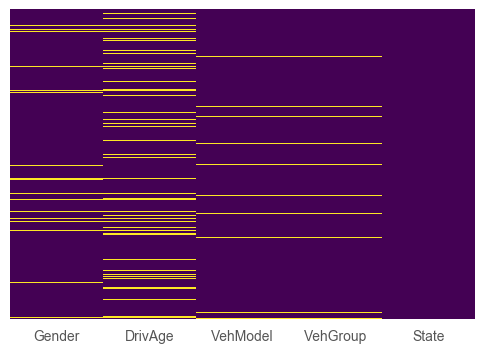

In [5]:
sns.heatmap(brevehins[["Gender","DrivAge","VehModel","VehGroup","State"]].isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Discussion on missing data.


Roughly 7~8% of DrivAge data is missing, while the missing Gender data and VehModel and VehGroup is even less. Since, datapoint is in order of millions dropping the Nan value will not cost us loss of information. Imputation based on KNN, or means may skew the result a bit and thus its safe to drop the missing data.

### 2.2) Drop the mising data

In [6]:
brevehins = brevehins.dropna()

## 3) Examine Dataframe

### Let the ETL Process commence:

In [7]:
def examine_data_frame( df):
    for name in df.columns:
        print "----------"
        print df[ name].dtype
        if df[ name].dtype is np.dtype( 'O'):
            print df[ name].value_counts()
            print "Name: ", name
        else:
            print df[ name].describe()

examine_data_frame(brevehins)

----------
object
Male         796222
Female       597645
Corporate    154389
Name: Gender, dtype: int64
Name:  Gender
----------
object
36-45    394277
46-55    365885
>55      357235
26-35    312257
18-25    118602
Name: DrivAge, dtype: int64
Name:  DrivAge
----------
float64
count    1.548256e+06
mean     2.005005e+03
std      6.428329e+00
min      0.000000e+00
25%      2.002000e+03
50%      2.006000e+03
75%      2.009000e+03
max      2.012000e+03
Name: VehYear, dtype: float64
----------
object
Outros                                                        18659
Fiat - Uno Mille 1.0 Fire/ F.flex/ Economy 4p                  7360
Toyota - Corolla Xei 1.8/1.8 Flex 16v Aut.                     6675
Fiat - Uno Mille 1.0 Fire/ F.flex/ Economy 2p                  6553
Ford - Ecosport Xlt 1.6/ 1.6 Flex 8v 5p                        6519
Ford - Ecosport Xls 1.6/ 1.6 Flex 8v 5p                        6486
Vw - Volkswagen - Gol City (trend) 1.0 Mi Total Flex 8v 4p     5882
Fiat - Siena 1.0/ Ex 

### 3.1) Purpose: I will be investigating whether a policy holder will file a large claim? (greater than the median in monetary terms)

The sum of all claims, <b>SumofClaims</b> for each policy holder during the exposure period is calculated (for robbery, partial collision, total collision, ﬁre and other guarantees).


The sum of all claims amount, <b>SumofClaimsAmt</b> for each policy holder during the exposure period is calculated (for robbery, partial collision, total collision, ﬁre and other guarantees).

The amount per claim, <b>AmtperClaim</b> for each policy holder during the exposure period is calculated by dividing SumofClaimsAmt by SumofClaims.


The motivation to combine the claims stems from the fact that by individualy treating each set of claims would be a tedious task. Though a lot of insight could be obtained by treating each claims set individually.

In [8]:
# Sum of all claims.

brevehins['SumofClaims'] = brevehins["ClaimNbRob"] + brevehins["ClaimNbPartColl"]+ \
                        brevehins["ClaimNbTotColl"] + brevehins["ClaimNbFire"] + brevehins["ClaimNbOther"]
    
# Sum of claim amount.

brevehins['SumofClaimsAmt'] = brevehins["ClaimAmountRob"] + brevehins["ClaimAmountPartColl"]+ \
                        brevehins["ClaimAmountTotColl"] + brevehins["ClaimAmountFire"] + brevehins["ClaimAmountOther"]
    
    
# Compute AmtperClaim only when, SumofCalims is non zero.

def is_sum_zero(x,y):
    if y>0:
        return(x/y)
    else:
        return 0
    

# Append to dataframe
brevehins['AmtperClaim'] = np.vectorize(is_sum_zero)(brevehins["SumofClaimsAmt"], brevehins["SumofClaims"])

In [9]:
# check top 5 frequency of sum of amount per calims by policy holders
values = brevehins['AmtperClaim'].value_counts()
values.head(5)

0     1261063
67      16728
36       9535
80       4065
60       2788
Name: AmtperClaim, dtype: int64

In [10]:
brevehins['AmtperClaim'].describe()


count    1.548256e+06
mean     9.060002e+02
std      5.238444e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.224830e+05
Name: AmtperClaim, dtype: float64

### Conclusion: 

Amount per claim median value is zero, of the entire population of the policy holders, 1261063 number of policy holders have zero amount in claims.

In [11]:
# Group amount per claims by Gender and Driverage and calculate the median
df = brevehins.groupby(by = ['Gender','DrivAge'],as_index=False)['AmtperClaim'].median()
df

,Gender,DrivAge,AmtperClaim
0,Corporate,18-25,0
1,Corporate,26-35,0
2,Corporate,36-45,0
3,Corporate,46-55,0
4,Corporate,>55,0
5,Female,18-25,0
6,Female,26-35,0
7,Female,36-45,0
8,Female,46-55,0
9,Female,>55,0


### Conclusion:

Median, as a metric is selected as it is a measure of central tendency and is not adversely influenced by extreme number.

Since median is zero, a threshold of AmtperClaim>0 will be set for high claims.

If the median of , <b>AmtperClaim >0 </b>, it will be treated as a high calim.

In [12]:
# Large claims?
def is_large_claims(x):
    if x>0:
        return 1
    else:
        return 0

# append to dataframe
brevehins['LargeClaims'] = np.vectorize(is_large_claims)(brevehins["AmtperClaim"])

In [13]:
brevehins['LargeClaims'].value_counts()

0    1261063
1     287193
Name: LargeClaims, dtype: int64

### Conclusion:

Of the total population, 18.5% of policy holders have filed for large claims.

## 4) Data Preprocessing.

One hot encoding, to create dummy variable for the categorical values

I will be using logistic regression, to model <b>LargeClaims</b> against the features. The reasoning behind choosing logistic regression are:

1) Logistic regression is intrinsically simple, it has low variance and so is less prone to over-fitting.

2) Easier to interpret coefficients.

### 4.1) Create dummy variable:

Drop 'VehModel', 'VehGroup'. In order to reduce dimensionality of the dataframe and to make the process less memory intensive. 

In [14]:
# Create dummy variable for categorical values
cols =['Gender','DrivAge','Area','StateAb']
data_1 = brevehins[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, brevehins], axis=1)
result_df.head()

,Gender_Corporate,Gender_Female,Gender_Male,DrivAge_18-25,DrivAge_26-35,DrivAge_36-45,DrivAge_46-55,DrivAge_>55,Area_Acre,Area_Alagoas,...,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther,SumofClaims,SumofClaimsAmt,AmtperClaim,LargeClaims
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,0,0.0,0,0,0,0.0,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0,0,0.0,0,0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0,0,0.0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,0,0.0,0,0,0,0.0,0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,648,0.0,0,0,1,648.0,648,1


In [15]:
result_df.columns.values # Performed one-hot encoding so that I can use it in EDA

array(['Gender_Corporate', 'Gender_Female', 'Gender_Male', 'DrivAge_18-25',
       'DrivAge_26-35', 'DrivAge_36-45', 'DrivAge_46-55', 'DrivAge_>55',
       'Area_Acre', 'Area_Alagoas', 'Area_Amapa', 'Area_Amazonas',
       'Area_Bahia', 'Area_Blumenau e demais regioes', 'Area_Brasilia',
       'Area_Ceara', 'Area_Demais regioes', 'Area_Espirito Santo',
       'Area_F.Iguatu-Medianeira-Cascavel-Toledo', 'Area_Goias',
       'Area_Grande Campinas', 'Area_Interior',
       'Area_Litoral Norte e Baixada Santista', 'Area_Maranhao',
       'Area_Mato Grosso', 'Area_Mato Grosso do Sul', 'Area_Met. Curitiba',
       'Area_Met. Florianopolis e Sul',
       'Area_Met. Porto Alegre e Caxias do Sul', 'Area_Met. de Sao Paulo',
       'Area_Met. do Rio de Janeiro',
       'Area_Met.BH-Centro Oeste-Zona Mata-C. Vertentes', 'Area_Oeste',
       'Area_Para', 'Area_Paraiba', 'Area_Pernambuco', 'Area_Piaui',
       'Area_Ribeirao Preto e Demais Mun. de Campinas',
       'Area_Rio Grande do Norte', 'Area_

## 5) Get insight by comparing output to features (EDA):

### 5.1) Comparing Qualitative vs. Quantitative Analysis

### 5.1.1 LargeClaims vs vehicle year

In [16]:
grouped = result_df.groupby( "LargeClaims")
veh_year = grouped[ "VehYear"].describe()
veh_year = veh_year.unstack( level=-1)
print veh_year

                 count         mean        std     min     25%     50%  \
LargeClaims                                                              
0            1261063.0  2004.834582   5.240599  1881.0  2002.0  2006.0   
1             287193.0  2005.751220  10.074545     0.0  2004.0  2007.0   

                75%     max  
LargeClaims                  
0            2009.0  2012.0  
1            2009.0  2011.0  


<b>Conclusion:</b>

Policy holders who file for large claims on average have older vehicles with meanyear as 2005 as the standard deviation is higher 10

### 5.1.2  LargeClaims vs ExposTotal

In [17]:
grouped = result_df.groupby( "LargeClaims")
expos_total = grouped[ "ExposTotal"].describe()
expos_total = expos_total.unstack( level=-1)
print expos_total

                 count       mean        std      min   25%   50%    75%  \
LargeClaims                                                                
0            1261063.0   1.236682   2.332815  0.00274  0.39  0.50   1.20   
1             287193.0  13.339471  36.629501  0.00000  1.51  4.59  12.72   

                 max  
LargeClaims           
0             208.33  
1            8078.44  


<b>Conclusion:</b>

ExposTotal(mean) is higher for LargeClaims-yes which suggests that higher the exposure, larger the claims.

### 5.1.3  LargeClaims vs PremTotal

In [18]:
grouped = result_df.groupby( "LargeClaims")
prem_total = grouped[ "PremTotal"].describe()
prem_total = prem_total.unstack( level=-1)
print prem_total

                 count          mean           std           min      25%  \
LargeClaims                                                                 
0            1261063.0   1594.934661   3416.612571  1.705303e-13   320.24   
1             287193.0  13504.334418  36961.777029  0.000000e+00  1704.63   

                 50%        75%         max  
LargeClaims                                  
0             728.23   1679.305   700067.05  
1            4868.19  12847.450  6478755.13  


<b>Conclusion:</b>

PremTotal(mean) is higher for LargeClaims-yes which suggests that higher the total premium, higher the occurance of large claims.

### 5.1.4  LargeClaims vs SumInsAvg

In [19]:
grouped = result_df.groupby( "LargeClaims")
sumins = grouped[ "SumInsAvg"].describe()
sumins = sumins.unstack( level=-1)
print sumins

                 count          mean           std  min       25%       50%  \
LargeClaims                                                                   
0            1261063.0  39014.863562  37606.296007  0.0  18577.05  29185.99   
1             287193.0  33110.386246  23837.831604  0.0  19937.45  27863.15   

                   75%         max  
LargeClaims                         
0            47248.995  1307269.94  
1            39072.660   904788.02  


<b>Conclusion:</b>

SumInsAvg (mean) have negative effect on the output. As mean of SumInsAvg rises, the occurances of LargeClaims reduces.

### 5.1.5  LargeClaims vs SumofClaims

In [20]:
grouped = result_df.groupby( "LargeClaims")
sum_claims = grouped[ "SumofClaims"].describe()
sum_claims = sum_claims.unstack( level=-1)
print sum_claims

                 count      mean        std  min  25%  50%  75%     max
LargeClaims                                                            
0            1261063.0  0.000000   0.000000  0.0  0.0  0.0  0.0     0.0
1             287193.0  4.409634  14.102637  1.0  1.0  2.0  3.0  1402.0


<b>Conclusion:</b>

SumofClaims (mean) is higher for LargeClaims-yes which suggests that higher the sum of claims, the freq of LargeClaims will rise. This is stating the obvious.

### 5.2) Comparing Qualitative vs. Qualitative Analysis

### 5.2.1 LargeClaims vs Gender

LargeClaims         0         1
Gender                         
Corporate    0.099718  0.000000
Female       0.304840  0.081171
Male         0.409947  0.104323


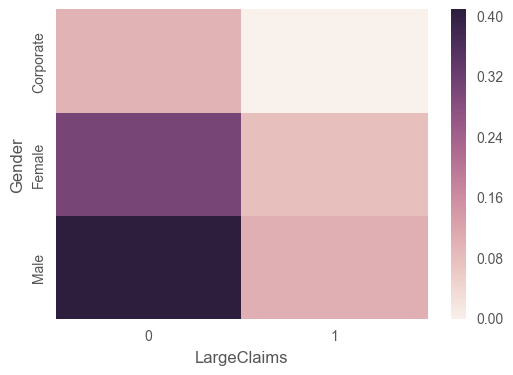

In [21]:
frequencies = pd.crosstab( result_df[ "Gender"], result_df[ "LargeClaims"]).apply(lambda r: r/len(result_df))
print frequencies
sns.heatmap( frequencies)

<b>Conclusion:</b>

LargeClaims-yes frequency for males are higher at 10% compared to females at 8%, men on average, file for larger claims. Coroporate claims have no impact on the output 

### 5.2.2 LargeClaims vs DrivAge

LargeClaims         0         1
DrivAge                        
18-25        0.064535  0.012069
26-35        0.163027  0.038656
36-45        0.204370  0.050289
46-55        0.193540  0.042781
>55          0.189035  0.041699


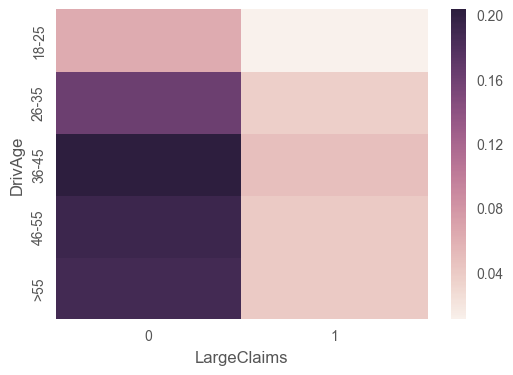

In [22]:
frequencies = pd.crosstab( result_df[ "DrivAge"], result_df[ "LargeClaims"]).apply(lambda r: r/len(result_df))
print frequencies
sns.heatmap( frequencies)

<b>Conclusion:</b>

LargeClaims-yes frequency is higher for the age group 36-45 at 5%, this is followed by 46-55 at 4.2%

### 5.2.3  LargeClaims vs StateAb

LargeClaims         0         1
StateAb                        
AC           0.003093  0.000428
AL           0.011255  0.001806
AM           0.008379  0.001238
AP           0.002403  0.000256
BA           0.023532  0.005883
CE           0.016877  0.003456
DF           0.022966  0.006618
ES           0.018573  0.004597
GO           0.029421  0.006604
MA           0.010107  0.001664
MG           0.087343  0.015604
MS           0.015141  0.002784
MT           0.014638  0.002843
PA           0.012214  0.002221
PB           0.011107  0.002014
PE           0.019354  0.004166
PI           0.007742  0.001496
PR           0.087842  0.014234
RJ           0.058927  0.015456
RN           0.011814  0.002733
RO           0.001999  0.000232
RR           0.002128  0.000196
RS           0.073913  0.012761
SC           0.080038  0.010448
SE           0.009702  0.001776
SP           0.166584  0.062896
TO           0.007411  0.001086


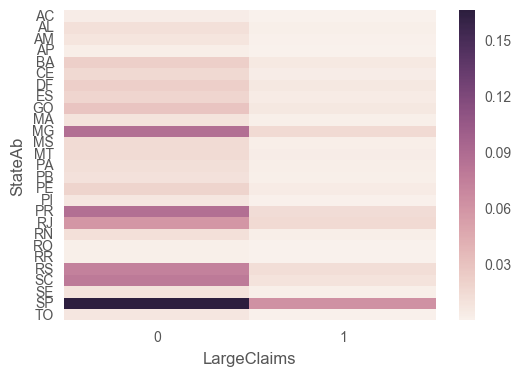

In [23]:
frequencies = pd.crosstab( result_df[ "StateAb"], result_df[ "LargeClaims"]).apply(lambda r: r/len(result_df))
print frequencies

sns.heatmap( frequencies)

<b>Conclusion:</b>

Greaterthnmean-yes frequency is highest for Sao Paulo at 6.2%



# 6) Logistic Regression and KMeans Clustering.

I will be using logistic regression to predict the output, LargeClaims. Logistic regression is intrinsically simple, it has low variance and so is less prone to over-fitting also Logistic regression will work better if there's a single decision boundary, not necessarily parallel to the axis.

Since I manually, coded the labels for LargeClaims this becomes a supervised learning problem. 



My Other approach is to use K Means clustering for LargeClaims, I would be using 2 clusters centers and then classify it against the labels that I already created.

### 6.1) Rename colums in the dataframe

In [42]:
result_df.rename(columns={'DrivAge_18-25': 'DrivAge_18_25', 'DrivAge_26-35':'DrivAge_26_35', 
                         'DrivAge_36-45': 'DrivAge_36_45',
                         'DrivAge_46-55': 'DrivAge_46_55',
                         'DrivAge_>55': 'DrivAge_55',
                         'Area_Blumenau e demais regioes': 'Area_Blumenau_e_demais_regioes',
                         'Area_Demais regioes': 'Area_Demais_regioes',
                         'Area_Espirito Santo': 'Area_Espirito_Santo',
                         'Area_F.Iguatu-Medianeira-Cascavel-Toledo': 'Area_F_Iguatu-Medianeira_Cascavel_Toledo',
                         'Area_Grande Campinas': 'Area_Grande_Campinas',
                         'Area_Litoral Norte e Baixada Santista': 'Area_Litoral_Norte_e_Baixada_Santista',
                         'Area_Mato Grosso': 'Area_Mato Grosso',
                         'Area_Mato Grosso do Sul': 'Area_Mato_Grosso_do_Sul',
                         'Area_Met. de Sao Paulo': 'Area_Met_de_Sao_Paulo',
                         'Area_Met. do Rio de Janeiro': 'Area_Met_do_Rio_de_Janeiro',
                         'Area_Met.BH-Centro Oeste-Zona Mata-C. Vertentes': 'Area_Met_BH_Centro_Oeste_Zona_Mata_C_Vertentes',
                         'Area_Ribeirao Preto e Demais Mun. de Campinas': 'Area_Ribeirao_Preto_e_Demais_Mun_de_Campinas',
                         'Area_Rio Grande do Norte': 'Area_Rio_Grande_do_Norte',
                         'Area_Sudeste de Goias': 'Area_Sudeste_de_Goias',
                         'Area_Triangulo mineiro': 'Area_Triangulo_mineiro',
                         'Area_Vale do Aco-Norte-Vale Jequitinhonha': 'Area_Vale_do_Aco_Norte_Vale_Jequitinhonha',
                         'Area_Vale do Paraiba e Ribeira': 'Area_Vale_do_Paraiba_e_Ribeira',
                         'Area_Met. Curitiba': 'Area_Met_Curitiba',
                          'Area_Met. Florianopolis e Sul': 'Area_Met_Florianopolis_e_Sul',
                          'Area_Met. Porto Alegre e Caxias do Sul': 'Area_Met_Porto_Alegre_e_Caxias_do_Sul'}, inplace=True)

In [43]:
result_df.columns.values

array(['Gender_Corporate', 'Gender_Female', 'Gender_Male', 'DrivAge_18_25',
       'DrivAge_26_35', 'DrivAge_36_45', 'DrivAge_46_55', 'DrivAge_55',
       'Area_Acre', 'Area_Alagoas', 'Area_Amapa', 'Area_Amazonas',
       'Area_Bahia', 'Area_Blumenau_e_demais_regioes', 'Area_Brasilia',
       'Area_Ceara', 'Area_Demais_regioes', 'Area_Espirito_Santo',
       'Area_F_Iguatu-Medianeira_Cascavel_Toledo', 'Area_Goias',
       'Area_Grande_Campinas', 'Area_Interior',
       'Area_Litoral_Norte_e_Baixada_Santista', 'Area_Maranhao',
       'Area_Mato Grosso', 'Area_Mato_Grosso_do_Sul', 'Area_Met_Curitiba',
       'Area_Met_Florianopolis_e_Sul',
       'Area_Met_Porto_Alegre_e_Caxias_do_Sul', 'Area_Met_de_Sao_Paulo',
       'Area_Met_do_Rio_de_Janeiro',
       'Area_Met_BH_Centro_Oeste_Zona_Mata_C_Vertentes', 'Area_Oeste',
       'Area_Para', 'Area_Paraiba', 'Area_Pernambuco', 'Area_Piaui',
       'Area_Ribeirao_Preto_e_Demais_Mun_de_Campinas',
       'Area_Rio_Grande_do_Norte', 'Area_Rondonia

### 6.2) Use standard scalar to scale all the variables since we have high dimentionality & I will be  using l2_regularized logistic regression



Important Assumptions for this logistic regression:

I decided to scale the variables since I have decided to use l2 regularization due to high dimensionality in the data. I lack domain knowledge and l1 would have helped, but L2 regularization isn’t really strong for feature-selection but rather tries to reduce the complexity of the model by preventing very large weighting on features. (what I really need in this instance)

If I were using L1 regularization then its the case of caring about feature-selection, as that is it’s main power. It reduces the complexity of the learned model by causing some features being ignored completely, which is called sparsity.

By using L1-regularization one is giving some thought to automatic feature-selection. The real question is: should I care more about feature selection? That depends on the problem statement, how much time I have and the experience-level.


In [44]:
result_df2 = result_df[['Gender_Corporate', 'Gender_Female', 'Gender_Male', 'DrivAge_18_25',
       'DrivAge_26_35', 'DrivAge_36_45', 'DrivAge_46_55', 'DrivAge_55',
       'Area_Acre', 'Area_Alagoas', 'Area_Amapa', 'Area_Amazonas',
       'Area_Bahia', 'Area_Blumenau_e_demais_regioes', 'Area_Brasilia',
       'Area_Ceara', 'Area_Demais_regioes', 'Area_Espirito_Santo',
       'Area_F_Iguatu-Medianeira_Cascavel_Toledo', 'Area_Goias',
       'Area_Grande_Campinas', 'Area_Interior',
       'Area_Litoral_Norte_e_Baixada_Santista', 'Area_Maranhao',
       'Area_Mato Grosso', 'Area_Mato_Grosso_do_Sul', 'Area_Met_Curitiba',
       'Area_Met_Florianopolis_e_Sul',
       'Area_Met_Porto_Alegre_e_Caxias_do_Sul', 'Area_Met_de_Sao_Paulo',
       'Area_Met_do_Rio_de_Janeiro',
       'Area_Met_BH_Centro_Oeste_Zona_Mata_C_Vertentes', 'Area_Oeste',
       'Area_Para', 'Area_Paraiba', 'Area_Pernambuco', 'Area_Piaui',
       'Area_Ribeirao_Preto_e_Demais_Mun_de_Campinas',
       'Area_Rio_Grande_do_Norte', 'Area_Rondonia', 'Area_Roraima',
       'Area_Sergipe', 'Area_Sudeste_de_Goias', 'Area_Sul',
       'Area_Tocantins', 'Area_Triangulo_mineiro',
       'Area_Vale_do_Aco_Norte_Vale_Jequitinhonha',
       'Area_Vale_do_Paraiba_e_Ribeira', 'StateAb_AC', 'StateAb_AL',
       'StateAb_AM', 'StateAb_AP', 'StateAb_BA', 'StateAb_CE',
       'StateAb_DF', 'StateAb_ES', 'StateAb_GO', 'StateAb_MA',
       'StateAb_MG', 'StateAb_MS', 'StateAb_MT', 'StateAb_PA',
       'StateAb_PB', 'StateAb_PE', 'StateAb_PI', 'StateAb_PR',
       'StateAb_RJ', 'StateAb_RN', 'StateAb_RO', 'StateAb_RR',
       'StateAb_RS', 'StateAb_SC', 'StateAb_SE', 'StateAb_SP',
       'StateAb_TO',  'VehYear','ExposTotal',
       'ExposFireRob', 'PremTotal', 'PremFireRob', 'SumInsAvg',
       'ClaimNbRob', 'ClaimNbPartColl', 'ClaimNbTotColl', 'ClaimNbFire',
       'ClaimNbOther', 'ClaimAmountRob', 'ClaimAmountPartColl',
       'ClaimAmountTotColl', 'ClaimAmountFire', 'ClaimAmountOther',
       'SumofClaims', 'SumofClaimsAmt', 'AmtperClaim', 'LargeClaims']]
y = result_df2['LargeClaims'].values
X = result_df2[['Gender_Corporate', 'Gender_Female', 'Gender_Male', 'DrivAge_18_25',
       'DrivAge_26_35', 'DrivAge_36_45', 'DrivAge_46_55', 'DrivAge_55',
       'Area_Acre', 'Area_Alagoas', 'Area_Amapa', 'Area_Amazonas',
       'Area_Bahia', 'Area_Blumenau_e_demais_regioes', 'Area_Brasilia',
       'Area_Ceara', 'Area_Demais_regioes', 'Area_Espirito_Santo',
       'Area_F_Iguatu-Medianeira_Cascavel_Toledo', 'Area_Goias',
       'Area_Grande_Campinas', 'Area_Interior',
       'Area_Litoral_Norte_e_Baixada_Santista', 'Area_Maranhao',
       'Area_Mato Grosso', 'Area_Mato_Grosso_do_Sul', 'Area_Met_Curitiba',
       'Area_Met_Florianopolis_e_Sul',
       'Area_Met_Porto_Alegre_e_Caxias_do_Sul', 'Area_Met_de_Sao_Paulo',
       'Area_Met_do_Rio_de_Janeiro',
       'Area_Met_BH_Centro_Oeste_Zona_Mata_C_Vertentes', 'Area_Oeste',
       'Area_Para', 'Area_Paraiba', 'Area_Pernambuco', 'Area_Piaui',
       'Area_Ribeirao_Preto_e_Demais_Mun_de_Campinas',
       'Area_Rio_Grande_do_Norte', 'Area_Rondonia', 'Area_Roraima',
       'Area_Sergipe', 'Area_Sudeste_de_Goias', 'Area_Sul',
       'Area_Tocantins', 'Area_Triangulo_mineiro',
       'Area_Vale_do_Aco_Norte_Vale_Jequitinhonha',
       'Area_Vale_do_Paraiba_e_Ribeira', 'StateAb_AC', 'StateAb_AL',
       'StateAb_AM', 'StateAb_AP', 'StateAb_BA', 'StateAb_CE',
       'StateAb_DF', 'StateAb_ES', 'StateAb_GO', 'StateAb_MA',
       'StateAb_MG', 'StateAb_MS', 'StateAb_MT', 'StateAb_PA',
       'StateAb_PB', 'StateAb_PE', 'StateAb_PI', 'StateAb_PR',
       'StateAb_RJ', 'StateAb_RN', 'StateAb_RO', 'StateAb_RR',
       'StateAb_RS', 'StateAb_SC', 'StateAb_SE', 'StateAb_SP',
       'StateAb_TO',  'VehYear','ExposTotal',
       'ExposFireRob', 'PremTotal', 'PremFireRob', 'SumInsAvg',
       'ClaimNbRob', 'ClaimNbPartColl', 'ClaimNbTotColl', 'ClaimNbFire',
       'ClaimNbOther', 'ClaimAmountRob', 'ClaimAmountPartColl',
       'ClaimAmountTotColl', 'ClaimAmountFire', 'ClaimAmountOther']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

lr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight="balanced") # get object, the 'C' value is less 
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,result_df2.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0]), reverse = True) # sort them by the magnitude of the weight
print "Most important features.."
for coef, name in zip_vars:
    print name, 'has weight of', coef[0] # now print them out
print    
# Determine the false positive and true positive rates
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print 'accuracy:', acc 
print "Confusion matrix : "
print conf
print
print "Classification Report.."
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

Most important features..
ClaimNbOther has weight of 39.3991508407
ClaimNbPartColl has weight of 12.8324865218
ClaimAmountOther has weight of 9.70807506544
ClaimAmountPartColl has weight of 3.53102748378
ClaimNbRob has weight of 2.74941431246
ClaimNbTotColl has weight of 1.66115779054
Gender_Corporate has weight of -1.41272258503
ExposTotal has weight of 0.874480384511
ClaimAmountRob has weight of 0.71464475513
ClaimAmountTotColl has weight of 0.595348017294
Gender_Male has weight of 0.435138578552
Gender_Female has weight of 0.42364290264
ClaimNbFire has weight of 0.351041165365
PremTotal has weight of 0.312697692622
SumInsAvg has weight of -0.143261571693
StateAb_SP has weight of 0.119446465432
Area_Met_de_Sao_Paulo has weight of 0.118847867172
Area_Demais_regioes has weight of -0.0990869419646
Area_F_Iguatu-Medianeira_Cascavel_Toledo has weight of -0.0969204308026
StateAb_RS has weight of -0.0843154272832
ClaimAmountFire has weight of 0.0770468013064
StateAb_SC has weight of -0.0747

### The logistic regression is extremly accurate in classifying , LargeClaims as I have already included all the features that causes variability in the output. 

### Conclusion:

Most important features to detremine Large Claims in order of weight:

 - Features by <b>Claims</b>: 

ClaimNbOther has weight of 39.5370356179

ClaimNbPartColl has weight of 12.9030127218

ClaimAmountOther has weight of 9.79904240762

ClaimAmountPartColl has weight of 3.58553634115

ClaimNbRob has weight of 2.75156105227

ClaimNbTotColl has weight of 1.6607664322


 - Features by <b>States</b> and <b>Area</b>:

StateAb_SP has weight of 0.118891270479

Area_Met. de Sao Paulo has weight of 0.118883136509

 - Features by <b>Gender</b>:

Gender_Male has weight of 0.437100068967


Gender_Female has weight of 0.425773855997

 

Plot of most important features...


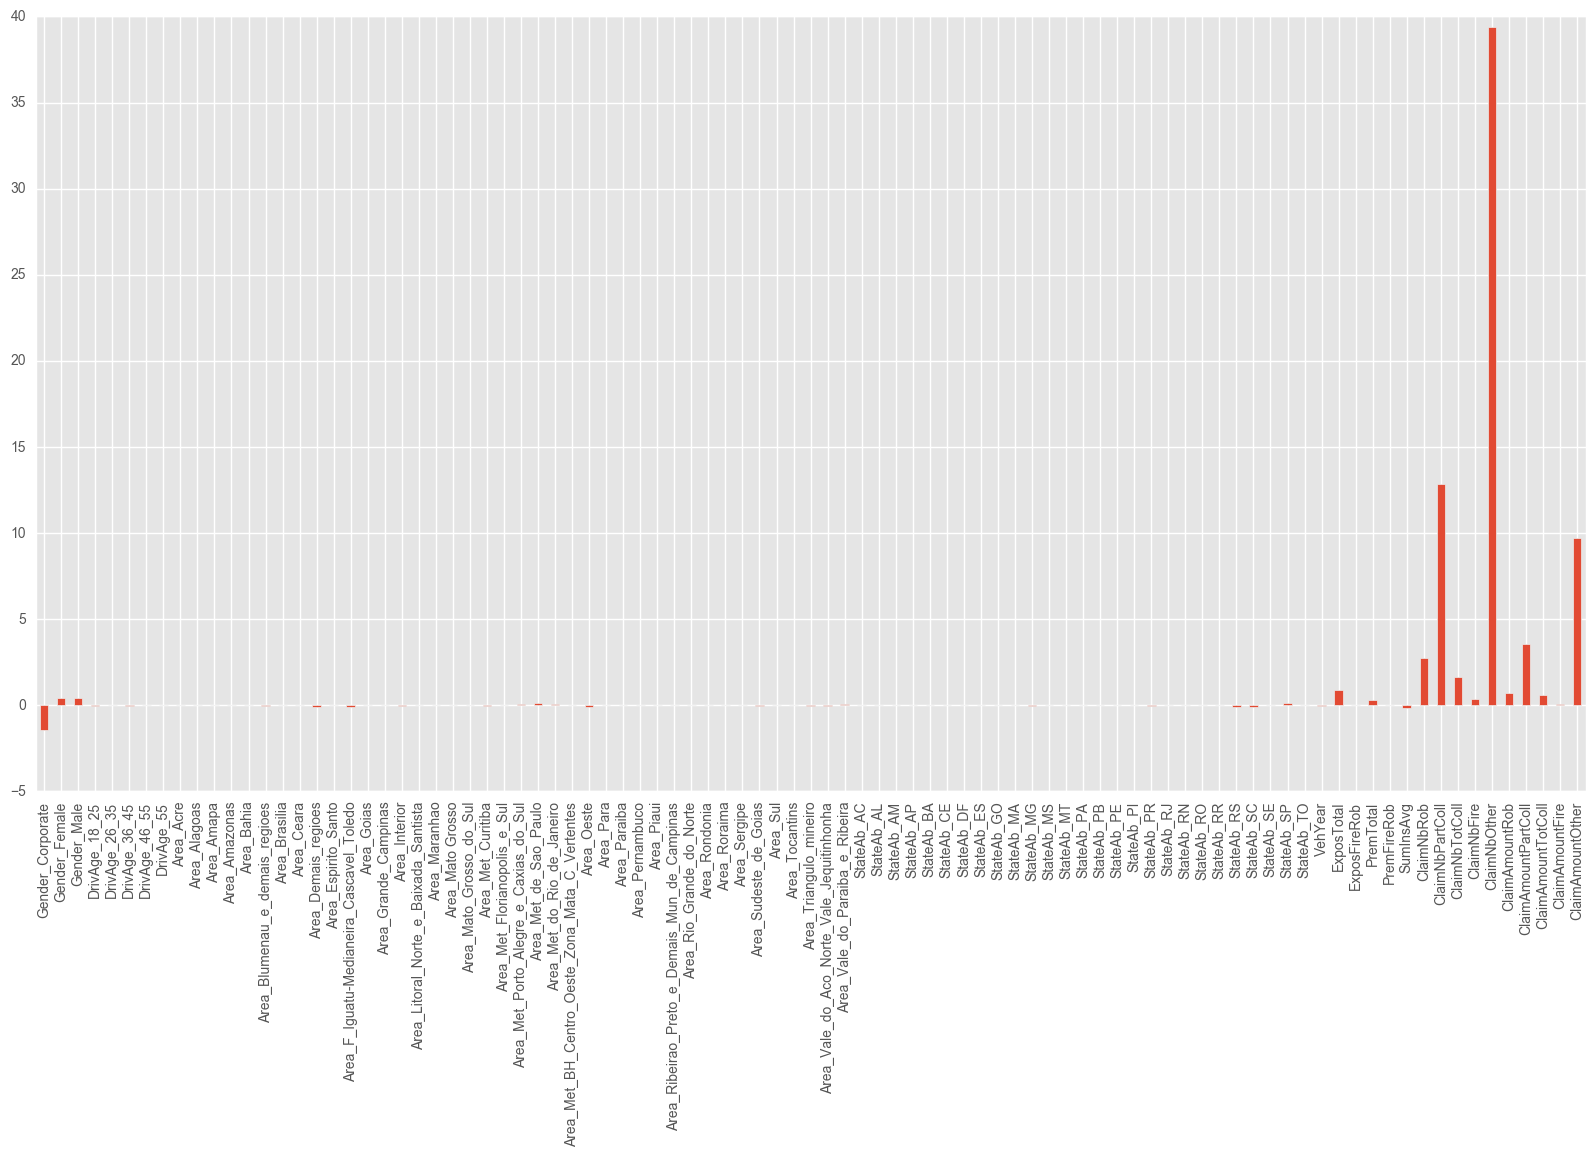

In [48]:
print "Plot of most important features..."
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt

%matplotlib inline
figure = plt.figure(figsize=(20, 10))

plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index = ['Gender_Corporate', 'Gender_Female', 'Gender_Male', 'DrivAge_18_25',
       'DrivAge_26_35', 'DrivAge_36_45', 'DrivAge_46_55', 'DrivAge_55',
       'Area_Acre', 'Area_Alagoas', 'Area_Amapa', 'Area_Amazonas',
       'Area_Bahia', 'Area_Blumenau_e_demais_regioes', 'Area_Brasilia',
       'Area_Ceara', 'Area_Demais_regioes', 'Area_Espirito_Santo',
       'Area_F_Iguatu-Medianeira_Cascavel_Toledo', 'Area_Goias',
       'Area_Grande_Campinas', 'Area_Interior',
       'Area_Litoral_Norte_e_Baixada_Santista', 'Area_Maranhao',
       'Area_Mato Grosso', 'Area_Mato_Grosso_do_Sul', 'Area_Met_Curitiba',
       'Area_Met_Florianopolis_e_Sul',
       'Area_Met_Porto_Alegre_e_Caxias_do_Sul', 'Area_Met_de_Sao_Paulo',
       'Area_Met_do_Rio_de_Janeiro',
       'Area_Met_BH_Centro_Oeste_Zona_Mata_C_Vertentes', 'Area_Oeste',
       'Area_Para', 'Area_Paraiba', 'Area_Pernambuco', 'Area_Piaui',
       'Area_Ribeirao_Preto_e_Demais_Mun_de_Campinas',
       'Area_Rio_Grande_do_Norte', 'Area_Rondonia', 'Area_Roraima',
       'Area_Sergipe', 'Area_Sudeste_de_Goias', 'Area_Sul',
       'Area_Tocantins', 'Area_Triangulo_mineiro',
       'Area_Vale_do_Aco_Norte_Vale_Jequitinhonha',
       'Area_Vale_do_Paraiba_e_Ribeira', 'StateAb_AC', 'StateAb_AL',
       'StateAb_AM', 'StateAb_AP', 'StateAb_BA', 'StateAb_CE',
       'StateAb_DF', 'StateAb_ES', 'StateAb_GO', 'StateAb_MA',
       'StateAb_MG', 'StateAb_MS', 'StateAb_MT', 'StateAb_PA',
       'StateAb_PB', 'StateAb_PE', 'StateAb_PI', 'StateAb_PR',
       'StateAb_RJ', 'StateAb_RN', 'StateAb_RO', 'StateAb_RR',
       'StateAb_RS', 'StateAb_SC', 'StateAb_SE', 'StateAb_SP',
       'StateAb_TO',  'VehYear','ExposTotal',
       'ExposFireRob', 'PremTotal', 'PremFireRob', 'SumInsAvg',
       'ClaimNbRob', 'ClaimNbPartColl', 'ClaimNbTotColl', 'ClaimNbFire',
       'ClaimNbOther', 'ClaimAmountRob', 'ClaimAmountPartColl',
       'ClaimAmountTotColl', 'ClaimAmountFire', 'ClaimAmountOther'])
weights.plot(kind='bar')

plt.show()

### 6.3) Using KMeans Cluster

Objective is to create two cluster centres LargeClaim-0 and 1 and then compare against the generated lables to test the accuracy of prediction.

In [37]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [38]:
kmn = KMeans(n_clusters=2)

**Fit the model to all the data **

In [39]:
kmn.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

** What are the cluster center vectors?**

In [40]:
kmn.cluster_centers_

array([[  9.30280726e-02,   3.97232525e-01,   5.09739402e-01,
          8.06683165e-02,   2.03832414e-01,   2.48760999e-01,
          2.34325744e-01,   2.32412526e-01,   3.42998357e-03,
          1.31391360e-02,   2.62853897e-03,   9.67071731e-03,
          2.89466698e-02,   3.94266611e-02,   2.98947374e-02,
          2.00688559e-02,   7.63529004e-02,   2.34959924e-02,
          2.19891912e-02,   2.75444976e-02,   3.98352127e-02,
          2.74341744e-02,   1.82624026e-02,   1.14017237e-02,
          1.69064950e-02,   1.77577630e-02,   4.46346274e-02,
          3.05118355e-02,   4.69656496e-02,   7.41236602e-02,
          4.76297241e-02,   4.13263552e-02,   2.14489634e-02,
          1.40117569e-02,   1.31014126e-02,   2.33023930e-02,
          9.08208971e-03,   6.03987436e-02,   1.45470023e-02,
          2.28048710e-03,   2.30824584e-03,   1.14358883e-02,
          8.27423925e-03,   2.29586117e-02,   8.33402730e-03,
          2.65394889e-02,   1.33533766e-02,   3.52457680e-02,
        

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however  we do have the labels, so we take advantage of this to evaluate our clusters.

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(result_df2['LargeClaims'],kmn.labels_ ))

print('\n')

print(classification_report(result_df2['LargeClaims'],kmn.labels_))

[[1132361  128702]
 [ 272561   14632]]


             precision    recall  f1-score   support

          0       0.81      0.90      0.85   1261063
          1       0.10      0.05      0.07    287193

avg / total       0.68      0.74      0.70   1548256



Not so bad considering the algorithm is purely using the features to cluster the LargerClaims into 2 distinct groups.